## Observations and Insights 

There is a positive correlation between mouse weight & tumor volume in the Capomulin mouse. This makes sense as logically, weight would be increasing the larger the mouse's tumor size.

Tumor volume went down over time as the mouse s185 was treated with Capomulin. We might need more data, but it's possible to say there is an effectiveness in the drug in treating tumor volume in mice.

The demographic of mice tested with treatment is almost evenly split amongst male and female mice. It's possible to say this sample size is representative of the gener

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataframe = pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [90]:
# Checking the number of mice.
merged_dataframe["Mouse ID"].value_counts()

g989    13
y478    10
a963    10
s185    10
s337    10
        ..
t573     1
l872     1
o848     1
x226     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_dataframe[["Mouse ID", "Timepoint"]].value_counts()

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [92]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_mouse_indexed = merged_dataframe.set_index("Mouse ID")
dupey_mouse = merged_mouse_indexed.loc["g989",:]
dupey_mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [93]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_mouse_indexed.drop(index='g989')
clean_df.reset_index(inplace=True)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [94]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

y478    10
a411    10
w575    10
j296    10
i901    10
        ..
t573     1
l872     1
o848     1
x226     1
f932     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_grouped = clean_df.groupby("Drug Regimen")
mean = round(drug_grouped["Tumor Volume (mm3)"].mean(),2)
median = round(drug_grouped["Tumor Volume (mm3)"].median(),2)
var = round(drug_grouped["Tumor Volume (mm3)"].var(),2)
sem = round(drug_grouped["Tumor Volume (mm3)"].sem(),2)
std = round(drug_grouped["Tumor Volume (mm3)"].std(),2)

summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Variance Tumor Volume": var,
                              "Standard Deviation Tumor Volume": std,
                              "Standard Error of Mean Tumor Volume": sem})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of Mean Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

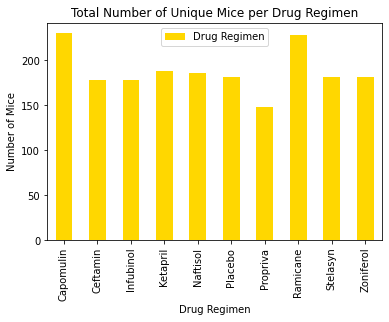

In [97]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_drug_df = pd.DataFrame(drug_grouped["Drug Regimen"].count())
mice_drug_bar = mice_drug_df.plot(kind="bar", title="Total Number of Unique Mice per Drug Regimen", color="gold")
mice_drug_bar.set_ylabel("Number of Mice")
mice_drug_bar.set_xlabel("Drug Regimen")

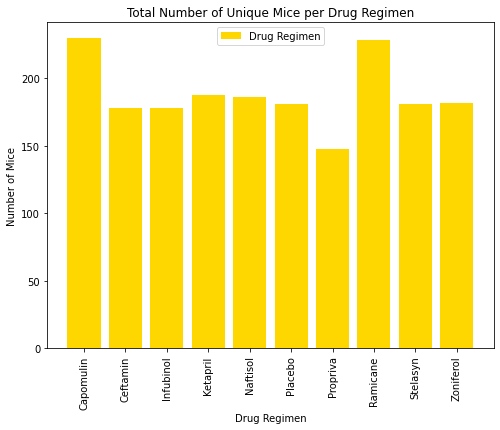

In [102]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_drug_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize = (8,6))
plt.bar(x_axis,mice_drug_df["Drug Regimen"], color="gold")
plt.xticks(tick_locations, list(mice_drug_df.index), rotation="vertical")
plt.title("Total Number of Unique Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend(["Drug Regimen"], loc="best")
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice'}, ylabel='Mouse ID'>

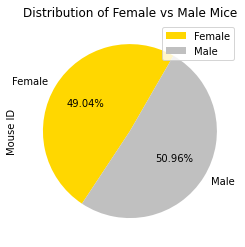

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df.groupby("Sex").count()["Mouse ID"]
gender_count.plot(kind="pie", y="Sex", title="Distribution of Female vs Male Mice", autopct="%1.2f%%", startangle=60, colors=["gold","silver"], legend="best")

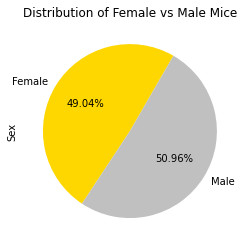

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_count.index.values)
gender_count = clean_df.groupby("Sex").count()["Mouse ID"]
colors = ["gold","silver"]
plt.pie(gender_count, labels=genders, colors=colors, autopct="%1.2f%%", startangle=60)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [105]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_list_df = clean_df[clean_df["Drug Regimen"].isin(drugs_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = drug_list_df[drug_list_df['Timepoint']==drug_list_df['Timepoint'].max()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df_merge = pd.merge(last_timepoints, clean_df, on=["Timepoint", "Mouse ID"], how="inner")
column_names = ["Drug Regimen_x", "Sex_x", "Age_months_x", "Weight (g)_x", "Tumor Volume (mm3)_x"]
last_df_merge_final = last_df_merge[column_names]
last_df_merge_final = last_df_merge_final.rename(columns={"Drug Regimen_x": "Drug Regimen",
                                                          "Sex_x": "Sex",
                                                          "Age_months_x":"Age in Months",
                                                          "Weight (g)_x": "Weight (g)",
                                                          "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
last_df_merge_final.head()

,Drug Regimen,Sex,Age in Months,Weight (g),Tumor Volume (mm3)
0,Ramicane,Male,21,16,22.050126
1,Capomulin,Female,3,17,23.343598
2,Capomulin,Female,16,15,28.484033
3,Capomulin,Male,22,17,28.430964
4,Ramicane,Male,11,16,29.128472


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for drug in drugs_list:
    drugs_vol = last_df_merge_final.loc[last_df_merge_final["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(drugs_vol)
    quartiles = drugs_vol.quantile([.25,.5,.75])
    lowerquartile = quartiles[0.25]
    upperquartile = quartiles[0.75]
    iqr = upperquartile-lowerquartile

    print(f"-"*47)
    print(f"IQR data for {drug}:")
    print(f"The lower quartile is: {lowerquartile}")
    print(f"The upper quartile is: {upperquartile}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]}")
    
    lowerbound = lowerquartile - (1.5*iqr)
    upperbound = upperquartile + (1.5*iqr)

    print(f"Values below {lowerbound} are outliers.")
    print(f"Values above {upperbound} are outliers.")

-----------------------------------------------
IQR data for Capomulin:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 37.31184577
Values below 20.70456164999999 are outliers.
Values above 51.83201549 are outliers.
-----------------------------------------------
IQR data for Ramicane:
The lower quartile is: 30.981175224999998
The upper quartile is: 38.508305307499995
The interquartile range is: 7.527130082499998
The the median is: 34.848627300000004
Values below 19.690480101250003 are outliers.
Values above 49.79900043124999 are outliers.
-----------------------------------------------
IQR data for Infubinol:
The lower quartile is: 62.75445141
The upper quartile is: 67.68556862
The interquartile range is: 4.9311172099999965
The the median is: 66.08306589
Values below 55.35777559500001 are outliers.
Values above 75.08224443499999 are outliers.
-----------------------------------------------
IQR data f

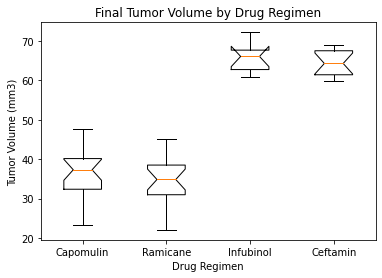

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax = plt.subplots()
ax.boxplot(tumor_vol_list,drugs_list)
ax.set_title("Final Tumor Volume by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4],drugs_list)
plt.show()

## Line and Scatter Plots

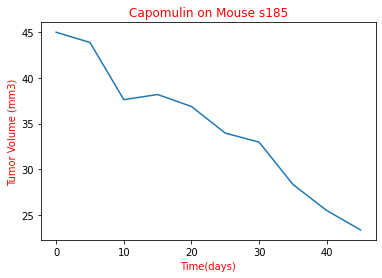

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="s185"]
time = capomulin_mouse["Timepoint"]
plt.plot(time, capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Capomulin on Mouse s185", color="red")
plt.xlabel("Time(days)", color="red")
plt.ylabel("Tumor Volume (mm3)", color="red")
plt.show()

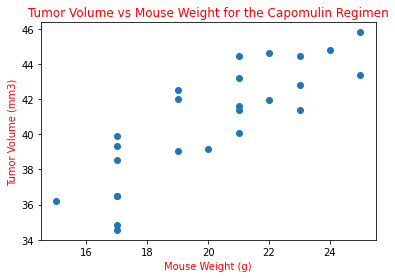

In [109]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse = capomulin.groupby("Mouse ID").mean()
capomulin_mouse_df = pd.DataFrame(capomulin_mouse)
plt.scatter(capomulin_mouse_df["Weight (g)"], capomulin_mouse_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs Mouse Weight for the Capomulin Regimen", color="red")
plt.xlabel("Mouse Weight (g)", color="red")
plt.ylabel("Tumor Volume (mm3)", color="red")
plt.show()

## Correlation and Regression

The correlation is: 0.84


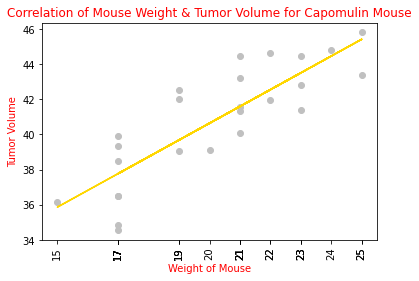

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
(slope, intercept, r, p, std_error) = st.linregress(weight, volume)
equation = slope * weight + intercept
plt.scatter(weight, volume, color="silver")
plt.title("Correlation of Mouse Weight & Tumor Volume for Capomulin Mouse", color="red")
plt.xlabel("Weight of Mouse", color="red")
plt.ylabel("Tumor Volume", color="red")
plt.plot(weight, equation, color="gold")
plt.xticks(weight, rotation=90)
correlation = round(st.pearsonr(weight, volume)[0],2)
print(f"The correlation is: {correlation}")